In [1]:
import numpy as np
import os, sys, time, subprocess, h5py, argparse, logging, pickle, random
from os.path import join as oj
import pandas as pd
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from cycler import cycler
from math import ceil
cm = plt.get_cmap('BuGn')
import logs_load_viz as ll

%matplotlib inline
%load_ext autoreload
%autoreload 2

# load in data from logs

In [2]:
path_to_results = '/Users/chandan/drive/research/scat/scat_results/cifar100/layer1_n2_vary_lr'
out_dir = '/Users/chandan/drive/research/vision/scat/scat_results/figs/layer1_n2_vary_lr'
results = ll.load_results(path_to_results)
keys = sorted(list(results.keys()))

# decoding the key names
# extra - ran for full 200 epochs (everything should be extra eventually)
# lr - lowered learning rate by factor of 10
# sep - separated conv/scat through layer 2
# _n2 - missing the last to layers
print(keys)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

['alexnet_n2_extra_lr_0.005', 'alexnet_n2_extra_lr_0.01', 'alexnet_n2_extra_lr_0.05', 'alexnet_n2_extra_lr_0.1', 'j2l2_n2_extra_lr_0.005', 'j2l2_n2_extra_lr_0.01', 'j2l2_n2_extra_lr_0.05', 'j2l2_n2_extra_lr_0.1', 'j2l3_n2_extra_lr_0.005', 'j2l3_n2_extra_lr_0.01', 'j2l3_n2_extra_lr_0.05', 'j2l3_n2_extra_lr_0.1', 'j2l4_n2_extra_lr_0.005', 'j2l4_n2_extra_lr_0.01', 'j2l4_n2_extra_lr_0.05', 'j2l4_n2_extra_lr_0.1', 'j2l8_n2_extra_lr_0.05']


# plot final train / val accs

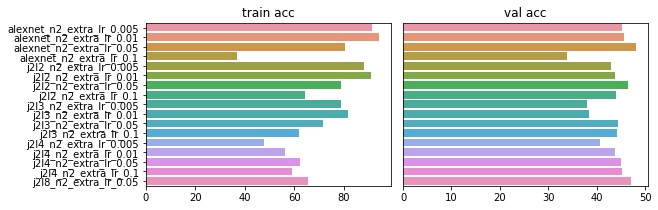

In [3]:
keys = sorted(list(results.keys()))
dicts = [results[key] for key in keys]

plt.figure(figsize=(9, 3), facecolor='white')

# plot train acc
plt.subplot(121)
sns.barplot([np.max(d['train']) for d in dicts], keys, orient='h')
plt.title('train acc')

# plot test acc
plt.subplot(122)
sns.barplot([np.max(d['val']) for d in dicts], keys, orient='h')
plt.gca().get_yaxis().set_visible(False)
plt.title('val acc')

# save and show
plt.subplots_adjust(wspace=0.05)
plt.savefig(oj(out_dir, 'cifar100_accs.pdf'))
plt.show()

# curves by model type
- *learning rate has a fairly significant effect, but lr = 0.05 is best*
- *note: learning rate goes down by factor of 10 each jump at 81, 122, 164, 206*

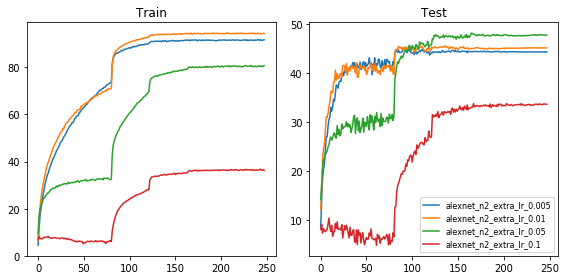

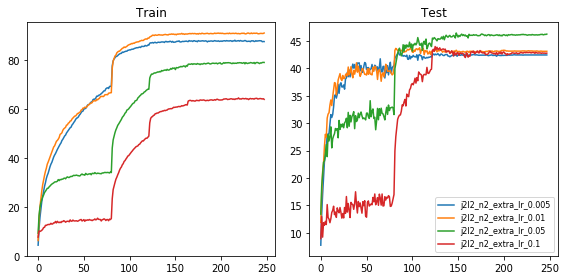

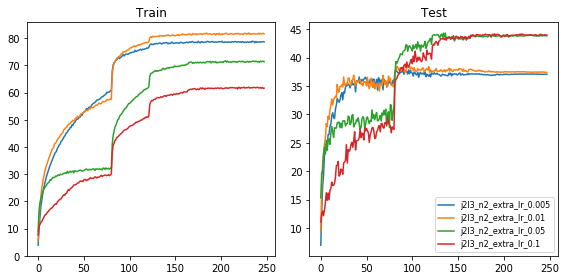

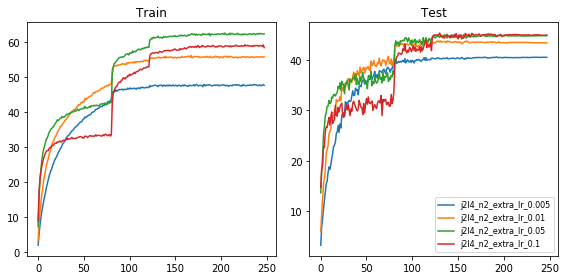

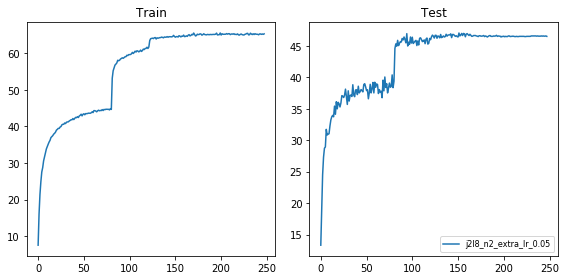

In [6]:
for model in ['alexnet', 'j2l2', 'j2l3', 'j2l4', 'j2l8']:
    ll.plot_train_val_curves([key for key in keys if model in key], results)

# problematic
*alexnet best curve trains faster than scat best curve*

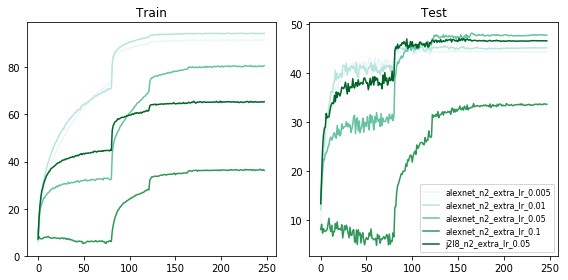

In [22]:
# plot_train_val_curves([key for key in keys if 'lr_0.01' in key], results, color='continuous')
plot_train_val_curves([key for key in keys if 'alexnet' in key or 'j2l8' in key], results, color='continuous')
plt.savefig(oj(out_dir, 'accs_n2.pdf'), dpi=600)
plt.show()

*fixing learning rate to 0.05, which yields the best final test results fixes this*

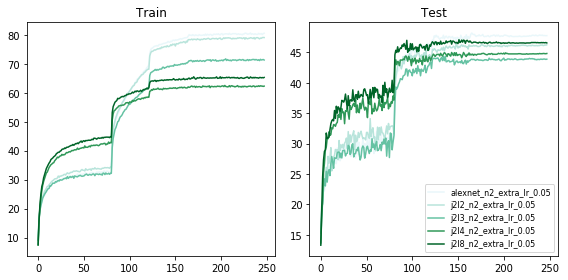

In [24]:
# note, j2l8 is not comparable as it has more total filters
plot_train_val_curves([key for key in keys if 'lr_0.05' in key], results, color='continuous')
# plot_train_val_curves([key for key in keys if 'lr_0.05' in key], results, color='continuous')
plt.savefig(oj(out_dir, 'accs_n2.pdf'), dpi=600)
plt.show()